In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import tweepy

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys

access_token = "1000996991860527105-QFYZ9XqSNaMWs6rJNRtujOrzn1KBxi"
access_token_secret = "MbR7g7I6r3uPIJoGuOYQlhej5TgZGfB2jJ9l0aGejXfdf"
consumer_key = "ZpYly1EpybyM0wBVdFiulvxEh"
consumer_secret = "kE0a9yq13tchDYkq9WLJ2AnnPMmYnfkRufYxhPoyTDGIDYgLJM"

In [2]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
for status in tweepy.Cursor(api.home_timeline).items(20):
    print(status.text)

In [ ]:
for status in tweepy.Cursor(api.home_timeline).items(10):
    print(status._json) 

In [ ]:
for friend in tweepy.Cursor(api.friends).items():
    print(friend._json)

In [6]:
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class Tweet_Listen(StreamListener):
    
    def on_data(self, data):

        try:
            print(data)
            #with open('twitter_data.json', 'a') as f:
                #f.write(data)
                
                #return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, Tweet_Listen())
twitter_stream.filter(track=['#Bernie2020'])

{"created_at":"Mon Apr 13 08:28:36 +0000 2020","id":1249615456979374080,"id_str":"1249615456979374080","text":"RT @RoseAnnDeMoro: So, #Bernie2020 is in second place due to dirty tricks, enormous superpacs, etc \n\nThen they asked Bernie to stop and sup\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":69434692,"id_str":"69434692","name":"Gemini_Girl \u264a \ud83c\udf39","screen_name":"dreamlover_09","location":"USA","url":null,"description":"college grad student, philosopher, anti-establishment #Bernie2020\n\n\ud83c\udf39\ud83d\udcaa Intrigue me \ud83c\udf39\ud83d\udcaa","translator_type":"none","protected":false,"verified":false,"followers_count":262,"friends_count":373,"listed_count":3,"favourites_count":43171,"statuses_coun

{"created_at":"Mon Apr 13 08:35:35 +0000 2020","id":1249617215596515328,"id_str":"1249617215596515328","text":"RT @Map4latte: Hey #BernieOnTheBallot guys theres an awesome person named @RashidaTlaib who needs help with her primary race in #MI13.  I'm\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1176101159938985984,"id_str":"1176101159938985984","name":"A movement, not just a Campaign #notmeus","screen_name":"whattimeline","location":null,"url":null,"description":"Dear Berners \u2764\nPlease Read this: https:\/\/www.reddit.com\/r\/BlackPeopleTwitter\/comments\/fxvlrw\/how_the_fuck_can_you_support_bernie_and_think\/fmwyq9b?utm_source=sh","translator_type":"none","protected":false,"verified":false,"followers_count":137,"frie

{"created_at":"Mon Apr 13 08:36:04 +0000 2020","id":1249617336895750144,"id_str":"1249617336895750144","text":"This is so cringy. I can't  believe this man will represent the democratic party. I feel sick \ud83e\udd2e #Bernie2020\u2026 https:\/\/t.co\/6YoPp620ZQ","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4896160001,"id_str":"4896160001","name":"Warren","screen_name":"blvckxpe","location":"Manchester, England","url":"https:\/\/soundcloud.com\/warren-joule-croft","description":"Just an average Joe trapped in the mindset of an 80's teen \ud83c\uddff\ud83c\uddfc Born \ud83c\uddec\ud83c\udde7 Bred RN4L! Oakland raiders \ud83c\udfc8  fueled by Gregg's pasty's...NORTHERN","translator_type":"none","protected":false,"verified":false,"f

KeyboardInterrupt: 

In [7]:
account_list=['@WHO']
if len(account_list) > 0:
    for target in account_list:
        print("Getting data for " + target)
        item = api.get_user(target)
        print("name: " + item.name)
        print("screen_name: " + item.screen_name)
        print("description: " + item.description)
        print("statuses_count: " + str(item.statuses_count))
        print("friends_count: " + str(item.friends_count))
        print("followers_count: \n" + str(item.followers_count))

Getting data for @WHO
name: World Health Organization (WHO)
screen_name: WHO
description: We are the #UnitedNations’ health agency. We are committed to achieving better health for everyone, everywhere - #HealthForAll
statuses_count: 49979
friends_count: 1717
followers_count: 
7302805


In [8]:
for target in account_list:
    item = api.get_user(target)
    tweets = item.statuses_count #counts no of tweets
    account_created_date =item.created_at

    #delta = datetime.utcnow() -account_created_date
    #account_age_days = delta.days
    print("Account created: " + str(account_created_date))
    print('No of Tweets: {:.2f}'.format(tweets))

Account created: 2008-04-23 19:56:27
No of Tweets: 49979.00


In [9]:
hashtags = []
mentions = []
tweet_count = 0
end_date = datetime.utcnow() - timedelta(days=30)
for i,status in enumerate(Cursor(api.user_timeline, id=target).items()):
    #print('Tweet nO: {:.2f}'.format(i),flush=True)
    tweet_count += 1
    if hasattr(status, "entities"):
        
        entities = status.entities
        if "hashtags" in entities:
            
            for ent in entities["hashtags"]:
                
                if ent is not None:
                    
                    if "text" in ent:
                        hashtag = ent["text"]
                        if hashtag is not None:
                            hashtags.append(hashtag)
        if "user_mentions" in entities:
            
            for ent in entities["user_mentions"]:
                
                if ent is not None:
                    
                    if "screen_name" in ent:
                        name = ent["screen_name"] 
                        if name is not None:
                            mentions.append(name)
                            
                              
                         
    if status.created_at < end_date:
        break


In [10]:
hashtags

['COVID19',
 'coronavirus',
 'SeamosActivos',
 'QuédateEnCasa',
 'SaludParaTodos',
 'COVID19',
 'Recuerda',
 'LavaTusManos',
 'โควิด19',
 'COVID19',
 'coronavirus',
 'COVID19',
 'COVID19',
 'COVID19',
 'ThanksHealthHeroes',
 'StayAtHome',
 'COVID19',
 'coronavirus',
 'OpenWHO',
 'COVID19',
 'COVID19',
 'OpenWHO',
 'COVID19',
 'COVID19',
 'StayAtHome',
 'COVID19',
 'StayHome',
 'COVID19',
 'Ebola',
 'DRC',
 'Ebola',
 'DRC',
 'Ebola',
 'Ebola',
 'DRC',
 'Ebola',
 'DRC',
 'COVID19',
 'COVID19',
 'COVID19',
 'DRC',
 'Ebola',
 'Ebola',
 'DRC',
 'healthworkers',
 'healthworkers',
 'COVID19',
 'healthworkers',
 'healthworkers',
 'StayHome',
 'COVID19',
 'COVID19',
 'coronavirus',
 'DRC',
 'Ebola',
 'Ebola',
 'DRC',
 'Ebola',
 'Ebola',
 'DRC',
 'COVID19',
 'coronavirus',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'coronavirus',
 'coronavirus',
 'C

In [11]:
entities

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'DrTedros',
   'name': 'Tedros Adhanom Ghebreyesus',
   'id': 189868631,
   'id_str': '189868631',
   'indices': [3, 12]},
  {'screen_name': 'unfoundation',
   'name': 'United Nations Foundation',
   'id': 39511166,
   'id_str': '39511166',
   'indices': [47, 60]}],
 'urls': []}

In [12]:
print("Most mentioned Twitter users:")
for item, count in Counter(mentions).most_common(30):
    print(item + "\t" + str(count))

print("Most used hashtags:")
for item, count in Counter(hashtags).most_common(30):
    print(item + "\t" + str(count))

print ("All done. Processed " + str(tweet_count) + " tweets.")

Most mentioned Twitter users:
DrTedros	305
WHO	106
UN	26
WHOEMRO	16
g20org	15
WHOWPRO	13
WHOAFRO	13
FIFAcom	12
antonioguterres	12
WHO_Europe	10
WHOSEARO	10
UNICEF	8
Refugees	8
WhatsApp	7
Alissonbecker	7
TurkicCouncil	6
Viber	6
ladygaga	6
KingSalman	5
WHOThailand	4
pahowho	4
WFP	4
UNOCHA	4
GlblCtzn	4
OPASOMSBrasil	4
opsomsuruguay	4
opsomsels	3
UNmigration	3
WHOAfghanistan	3
WHOPhilippines	3
Most used hashtags:
COVID19	459
coronavirus	125
SafeHands	36
healthworkers	34
WorldHealthDay	33
Ebola	18
DRC	16
HealthWorkers	16
OpenWHO	12
China	10
disability	9
WorldTBDay	8
HealthyAtHome	7
ThanksHealthHeroes	6
SupportNursesAndMidwives	6
BeActive	6
handwashing	6
TogetherAtHome	5
nurses	5
WorldWaterDay	5
StayHome	4
HealthForAll	4
Kuwait	4
ReadTheWorld	4
StayAtHome	3
AskWHO	3
Africa	3
mentalhealth	3
autism	3
breastfeeding	3
All done. Processed 1257 tweets.


In [13]:
print("Most used hashtags:")
for item, count in Counter(hashtags).most_common(30):
    print(item + "\t" + str(count))

Most used hashtags:
COVID19	459
coronavirus	125
SafeHands	36
healthworkers	34
WorldHealthDay	33
Ebola	18
DRC	16
HealthWorkers	16
OpenWHO	12
China	10
disability	9
WorldTBDay	8
HealthyAtHome	7
ThanksHealthHeroes	6
SupportNursesAndMidwives	6
BeActive	6
handwashing	6
TogetherAtHome	5
nurses	5
WorldWaterDay	5
StayHome	4
HealthForAll	4
Kuwait	4
ReadTheWorld	4
StayAtHome	3
AskWHO	3
Africa	3
mentalhealth	3
autism	3
breastfeeding	3


In [14]:
# Earth Science twitter course
import os
import tweepy as tw
import pandas as pd
import numpy as np



In [15]:
search_words = ['#COVID19']
date_since = "2020-4-10"

In [16]:
tweets = tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(50)
tweets

In [17]:
for tweet in tweets:
    print(tweet.text)

RT @aartic02: Best part about Kejriwal is that he welcomes Criticism &amp; takes Quick Corrective Actions 👉
*New Norms for Azadpur Mandi in Del…
RT @rtaworld: An aerial view of Kabul during the #COVID19 lockdown. A bustling city full of cars and people appears almost empty after the…
Join @ISG_News and @AutomationAnywh for an #ISGSmartalk #webinar to discuss the power of #IntelligentAutomation, ag… https://t.co/oOeW4kHlje
RT @Advaidism: Kerala : India's most successful state in handling #COVID19 https://t.co/dxSqQWVU8R
Team Fife recruits taking on new jobs in coronavirus response https://t.co/Nh3UOnTUVc #coronavirus #covid19
RT @bcomininvisible: #Coronavirus Crisis: *Leaked Home Office Call Reveals Govt wants Economy to ‘Continue Running’ as ‘We Will All Get’ #C…
"It is never too late to learn new skills. ‍The #Covid19 lockdown is the perfect time to Unlearn and Relearn"- Want… https://t.co/vO9yo4Yfnz
RT @ProfAkinAbayomi: #COVID19LAGOS update 
1️⃣Lagos confirmed 2 new cases of COVID19 

In [18]:
tweets = tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(50)
tweet_list=[tweet.text for tweet in tweets]

In [243]:
search_words = "#COVID19"
new_search = search_words  + "-filter:retweets"
new_search

'#COVID19-filter:retweets'

In [61]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(2000)
tweet_count += 1
tweet_list_nrw = [tweet.text for tweet in tweets]

In [21]:
tweet_list_nrw

['In the absence of a Virus, Social Distancing is the most effective measure to prevent the spread of the virus.\nStay… https://t.co/o5lXdY1NnM',
 '@Ollie_Akroyd @OldBrodleians You finally lost it @Ollie_Akroyd  #COVID19',
 'If 50% of the population are #Covid19 asymptomatic and only immune compromised folks are at risk of succumbing to… https://t.co/EY54U7Wxtp',
 '@realDonaldTrump Poor baby. Did someone hurt your feelings, AGAIN?\n\nYou really hate the leaks by White House staff… https://t.co/x9E7P8Gm9A',
 '@realDonaldTrump @nytimes @SecAzar MUST READ:\n\nDid you know that everytime someone blocks Trump, Twitter deducts 1… https://t.co/UuAHuyi098',
 'If you are feeling bored of your daily routine.. Read this article and add some colours in your boring days of quar… https://t.co/TQ0Qxp19om',
 'Natures Revenge #naturesrevenge #dailyjoke #just4laughsuk #nhssmile #COVID19 https://t.co/otJwveWjdh',
 'PENALTIES UP TO SAR 10,000 FOR NOT MEETING NEW MINISTRY OF INTERIOR REQUIREMENTS\n\nRead m

In [22]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(100)
tweet_count += 1
tweet_list_nrw = [tweet.text for tweet in tweets]
print(tweet_count)

1259


In [54]:
screen_name =[]
locations =[]
hashtags =[]
mentions =[]
texts =[]
user_locs =[]
date_since = "2020-4-11"
for i,status in enumerate(Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(2000)):
    uname = status.user.screen_name
    loc = status.user.location
    text = status.text
    
    screen_name.append(uname)
    locations.append(loc)
    texts.append(text)
    if hasattr(status, "entities"):
        entities = status.entities
    
    user_locs.append([uname,loc,text,[ent["text"] for ent in entities["hashtags"]],[ent["screen_name"] for ent in entities["user_mentions"]]])


In [ ]:
user_locs=np.c_[screen_name,locations,texts]

In [55]:
user_locs[:5]

[['girishgoa',
  'Goa',
  'Dear @goacm, the cracks appear on day one. BLO on #CommunitySurvey falls unconcious on Road at Gogol Hsg. Board &amp; h… https://t.co/XR6qGPLtKL',
  ['CommunitySurvey'],
  ['goacm']],
 ['DiplomaticIfe',
  'Podcast: "AfriCan Geopardy"',
  '@UtohPaul @tysalihu @bonario89 @ChifeDr @DokunOjomo @PoliceNG @Galafi_Hamma @mydeji247 @mr_ochonogor @AsiwajuLerry… https://t.co/6j41xjfpM4',
  [],
  ['UtohPaul',
   'tysalihu',
   'bonario89',
   'ChifeDr',
   'DokunOjomo',
   'PoliceNG',
   'Galafi_Hamma',
   'mydeji247',
   'mr_ochonogor',
   'AsiwajuLerry']],
 ['aruwasas',
  'Abuja, Nigeria',
  '#COVID19 scary #Death https://t.co/317e4wXdo6',
  ['COVID19', 'Death'],
  []],
 ['SharpDebbie',
  'Bristol, England',
  'And I thought this was a satirical post! Not fit for purpose @CQCProf . Public apology required #COVID19 https://t.co/R2TE75rxjr',
  ['COVID19'],
  ['CQCProf']],
 ['jimmy_halfcut',
  'Sydney, New South Wales',
  'Ice-ilation \U0001f9ca🥶🤣😂\n🌳🌳🌳\nBit of self care

In [56]:
hashtags

['CommunitySurvey',
 'COVID19',
 'Death',
 'COVID19',
 'PPEShortages',
 'GetMePPE',
 'MasksNow',
 'COVID19',
 'COVID19',
 'MondayMotivaton',
 'MondayMorning',
 'MondayMood',
 'Easter2020',
 'COVID19',
 'COVID19',
 'COVID19',
 'ico',
 'COVID19',
 'QuarantineLife',
 'HomeStudio',
 'COVID19',
 'spanishflu',
 'COVID19',
 'COVID19',
 'COVID19',
 'Covid19',
 'auspol',
 'Coronavirus',
 'StayAtHome',
 'TheDrum',
 'COVID19',
 'COVID19',
 'COVID2019',
 'COVID19',
 'AnythingForMumbai',
 'covid19',
 'keyworkers',
 'COVID19',
 'msm',
 'covid19',
 'MondayMotivation',
 'Work',
 'COVID19',
 'backtobusiness',
 'MICE',
 'COVID19',
 'Hydroxychloroquine',
 'COVID19',
 'COVID19',
 'Covid19',
 'COVID19',
 'menotringmonday',
 'covid19',
 'COVID19',
 'Rio',
 'Lockdown',
 'Punjab',
 'Hydroxychloroquine',
 'COVID19',
 'COVID19',
 'PANDEMIC',
 'RealNews',
 'Covid19',
 'vareity',
 'COVID19',
 'StayHome',
 'StaySafe',
 'COVID19',
 'Artsakh',
 'COVID19',
 'Odisha',
 'COVID19',
 'COVID19',
 'grateful',
 'LockdownEas

In [57]:
tweet_data = pd.DataFrame(data=user_locs,
                         columns=['user','location','text','hashtags','mentions'])
tweet_data

,user,location,text,hashtags,mentions
0,girishgoa,Goa,"Dear @goacm, the cracks appear on day one. BLO...",[CommunitySurvey],[goacm]
1,DiplomaticIfe,"Podcast: ""AfriCan Geopardy""",@UtohPaul @tysalihu @bonario89 @ChifeDr @Dokun...,[],"[UtohPaul, tysalihu, bonario89, ChifeDr, Dokun..."
2,aruwasas,"Abuja, Nigeria",#COVID19 scary #Death https://t.co/317e4wXdo6,"[COVID19, Death]",[]
3,SharpDebbie,"Bristol, England",And I thought this was a satirical post! Not f...,[COVID19],[CQCProf]
4,jimmy_halfcut,"Sydney, New South Wales",Ice-ilation 🧊🥶🤣😂\n🌳🌳🌳\nBit of self care during...,[],[]
...,...,...,...,...,...
1995,RNRSTV,"White Rock, British Columbia",Isolation Island - Soul in the City - Playlist...,"[ISOLATIONISLAN, TOURBUSTV, COVID19]",[]
1996,UpdateCovid,,"Coronavirus Update:\n☣️️ Total cases: 1,856,83...",[],[]
1997,sbmg_assam,"Guwahati, India",PHE Department installed Hand Washing Units at...,"[SwachhBharat, SwachhAssam]",[]
1998,Globalmenhealth,,The gendered dimensions of #COVID19. Important...,[COVID19],[TheLancet]


In [63]:
new_search = "climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="en",
                   since='2020-01-23').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]


['Inspired by Conway\'s "Game of Life" (yes, another Amiga classic) this time-series model uses a SIR epidemiological… https://t.co/QqsOCAW9Zk',
 '@Dribelo1 @ILuvCO2 @AlaMerQld @Stephengn @RoyPentland @EthonRaptor @weather_talk @craigthomler @3GHtweets @Lockg13… https://t.co/vPjNLqQBA8',
 '@ProudResister @JoeBiden Makes about as much sense as claiming climate change is the #1 priority and then voting fo… https://t.co/EO5lc4Szvn',
 '@njokingumi 😂 But we need to be careful, some climate change deniers could start using these jokes to argue their point 😬',
 "Not saying it will happen, but wouldn't be the first time one of the horseman caused a major downfall. \n\nEspecially… https://t.co/uzZ5gzl9vI"]

In [ ]:
# Cleaning Data and Frequency analysis
!pip3 install nltk

In [29]:
!pip3 install re
!pip3 install networkx

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [2]:
import os
import pandas as pd
import matplotlib as sns
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings

warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
itertools?

In [3]:
access_token = "1000996991860527105-QFYZ9XqSNaMWs6rJNRtujOrzn1KBxi"
access_token_secret = "MbR7g7I6r3uPIJoGuOYQlhej5TgZGfB2jJ9l0aGejXfdf"
consumer_key = "ZpYly1EpybyM0wBVdFiulvxEh"
consumer_secret = "kE0a9yq13tchDYkq9WLJ2AnnPMmYnfkRufYxhPoyTDGIDYgLJM"

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
search_term = '#climate+change -filter:retweets'
tweets = tw.Cursor(api.search,q=search_term,lang="en",since="2020-4-05").items(1000)

all_tweets = [tweet.text for tweet in tweets]

In [123]:
all_tweets[:5]

['Very good analysis by @McKinsey on relationships,  similarities &amp; differences between #Pandemics and #climate #risk… https://t.co/hndUwkm0pd',
 '#FEMA is overwhelmed, fire crews can’t fully prepare, emergency shelters are newly dangerous. And forecasters predi… https://t.co/cbktUZzmud',
 'Can attitude help save the planet? A frightened #climate reporter meets an ex-basketball player with a serious game… https://t.co/ORqidVM9ca',
 'The #coronavirus pandemic has put important #climate research in the #Arctic on hold https://t.co/AUSfjWoGFK',
 '#FEMA is overwhelmed, fire crews can’t fully prepare, emergency shelters are newly dangerous. And forecasters predi… https://t.co/tUL2XFMQXR']

In [ ]:
re? #string operations for text cleaning

In [124]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing 
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",txt).split())

In [205]:
all_tweets_nourls = [remove_url(tweet) for tweet in all_tweets]

In [206]:
all_tweets_nourls[:5]

['Very good analysis by @McKinsey on relationships,  similarities &amp; differences between #Pandemics and #climate #risk… ',
 '#FEMA is overwhelmed, fire crews can’t fully prepare, emergency shelters are newly dangerous. And forecasters predi… ',
 'Can attitude help save the planet? A frightened #climate reporter meets an ex-basketball player with a serious game… ',
 'The #coronavirus pandemic has put important #climate research in the #Arctic on hold ',
 '#FEMA is overwhelmed, fire crews can’t fully prepare, emergency shelters are newly dangerous. And forecasters predi… ']

In [199]:
ex_list = ["Dog", "dog", "dog", "cat", "cat", ","]
set(ex_list) #unique elements in a list #can't get unique words

{',', 'Dog', 'cat', 'dog'}

In [88]:
words_list = ["Dog", "dog", "dog", "cat", "cat", ","]
lower_case = [word.lower() for word in words_list]
lower_case


['dog', 'dog', 'dog', 'cat', 'cat', ',']

In [40]:
set(lower_case) #unique words for word frequency analysis

{',', 'cat', 'dog'}

In [127]:
#to get all words
all_tweets_nourls[0].split()

['Very',
 'good',
 'analysis',
 'by',
 'McKinsey',
 'on',
 'relationships',
 'similarities',
 'amp',
 'differences',
 'between',
 'Pandemics',
 'and',
 'climate',
 'risk']

In [128]:
all_tweets_nourls[0].lower().split()

['very',
 'good',
 'analysis',
 'by',
 'mckinsey',
 'on',
 'relationships',
 'similarities',
 'amp',
 'differences',
 'between',
 'pandemics',
 'and',
 'climate',
 'risk']

In [129]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_nourls]
words_in_tweet[:2]

[['very',
  'good',
  'analysis',
  'by',
  'mckinsey',
  'on',
  'relationships',
  'similarities',
  'amp',
  'differences',
  'between',
  'pandemics',
  'and',
  'climate',
  'risk'],
 ['fema',
  'is',
  'overwhelmed',
  'fire',
  'crews',
  'cant',
  'fully',
  'prepare',
  'emergency',
  'shelters',
  'are',
  'newly',
  'dangerous',
  'and',
  'forecasters',
  'predi']]

In [130]:
#colection.counter
#library collections, which helps create a special type of a Python dictonary. 
#The collection.Counter
#most_common will return the most commonly used words
# no times used

#to begin flatten the list to get all words in one list
#itertools can flatten list quickly
#ll_words = [item for sublist in tweets_nsw for item in sublist]

all_words_nourls = list(itertools.chain(*words_in_tweet))
counts_no_urls = collections.Counter(all_words_nourls)
counts_no_urls.most_common(15)

[('climate', 507),
 ('the', 386),
 ('change', 345),
 ('to', 257),
 ('of', 174),
 ('and', 169),
 ('a', 153),
 ('is', 143),
 ('in', 118),
 ('we', 110),
 ('for', 95),
 ('on', 87),
 ('climatechange', 72),
 ('covid19', 63),
 ('are', 58)]

In [131]:
clean_tweets_no_url = pd.DataFrame(counts_no_urls.most_common(15),
                                  columns=['words','count'])

In [132]:
clean_tweets_no_url.head()

,words,count
0,climate,507
1,the,386
2,change,345
3,to,257
4,of,174


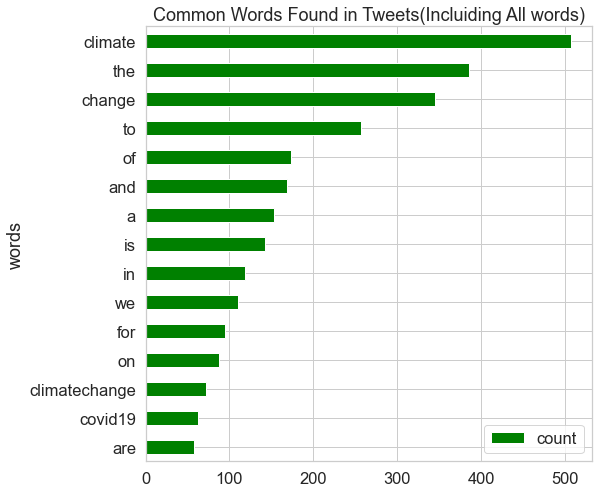

In [133]:
fig,ax = plt.subplots(figsize=(8,8))

clean_tweets_no_url.sort_values(by='count').plot.barh(x = 'words',
                                y = 'count',
                                ax = ax,
                                color='green')
ax.set_title("Common Words Found in Tweets(Incluiding All words)")
plt.show()

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adarshkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
stopwords.words

<bound method WordListCorpusReader.words of <WordListCorpusReader in '/Users/adarshkumar/nltk_data/corpora/stopwords'>>

In [97]:
stop_words = set(stopwords.words('english')) #remove stopwords

In [98]:
list(stop_words)[0:10] #to see such lists use list(stop_words)

['having', 'nor', 'it', 'those', 've', 'd', "shan't", 'does', 'but', "that'll"]

In [135]:
words_in_tweet[0]

['very',
 'good',
 'analysis',
 'by',
 'mckinsey',
 'on',
 'relationships',
 'similarities',
 'amp',
 'differences',
 'between',
 'pandemics',
 'and',
 'climate',
 'risk']

In [ ]:
for all_words in words_in_tweet:
    for word in all_words:
        # remove words

In [137]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
             for tweet_words in words_in_tweet]
tweets_nsw[1]

['fema',
 'overwhelmed',
 'fire',
 'crews',
 'cant',
 'fully',
 'prepare',
 'emergency',
 'shelters',
 'newly',
 'dangerous',
 'forecasters',
 'predi']

In [138]:
all_words_nsw = list(itertools.chain(*tweets_nsw))


In [139]:
counts_nsw = collections.Counter(all_words_nsw)
#counts_nsw

In [1]:
counts_nsw

NameError: name 'counts_nsw' is not defined

In [104]:
counts_nsw.most_common(15)

[('climate', 86),
 ('change', 59),
 ('climatechange', 11),
 ('coronavirus', 10),
 ('covid19', 10),
 ('science', 8),
 ('must', 8),
 ('amp', 6),
 ('pandemic', 6),
 ('air', 5),
 ('help', 5),
 ('act', 5),
 ('us', 5),
 ('global', 5),
 ('globalwarming', 5)]

In [140]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                               columns=['word','count'])

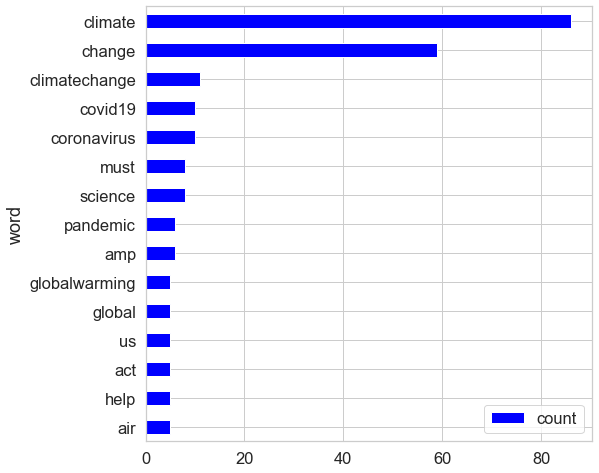

In [106]:
fig, ax = plt.subplots(figsize=(8,8))
clean_tweets_nsw.sort_values(by='count').plot.barh(x='word',
                                                  y='count',
                                                  ax=ax,
                                                  color='blue')

In [141]:
collection_word = ['climatechange', 'climate', 'change']

In [142]:
tweets_nsw_nc = [[w for w in words if not w in collection_word]
                for words in tweets_nsw]

In [143]:
tweets_nsw[10]

['attitude',
 'help',
 'save',
 'planet',
 'frightened',
 'climate',
 'reporter',
 'meets',
 'exbasketball',
 'player',
 'serious',
 'game']

In [144]:
tweets_nsw_nc[10]

['attitude',
 'help',
 'save',
 'planet',
 'frightened',
 'reporter',
 'meets',
 'exbasketball',
 'player',
 'serious',
 'game']

In [111]:
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))
count_nsw_nc = collections.Counter(all_words_nsw_nc)

count_nsw_nc.most_common(15)

[('coronavirus', 10),
 ('covid19', 10),
 ('science', 8),
 ('must', 8),
 ('amp', 6),
 ('pandemic', 6),
 ('air', 5),
 ('help', 5),
 ('act', 5),
 ('us', 5),
 ('global', 5),
 ('globalwarming', 5),
 ('links', 5),
 ('changes', 5),
 ('could', 4)]

In [145]:
len(count_nsw_nc)

642

In [146]:
clean_tweets_ncw =pd.DataFrame(count_nsw_nc.most_common(10),
                                 columns=['word','count'])
clean_tweets_ncw.head()

,word,count
0,coronavirus,10
1,covid19,10
2,science,8
3,must,8
4,amp,6


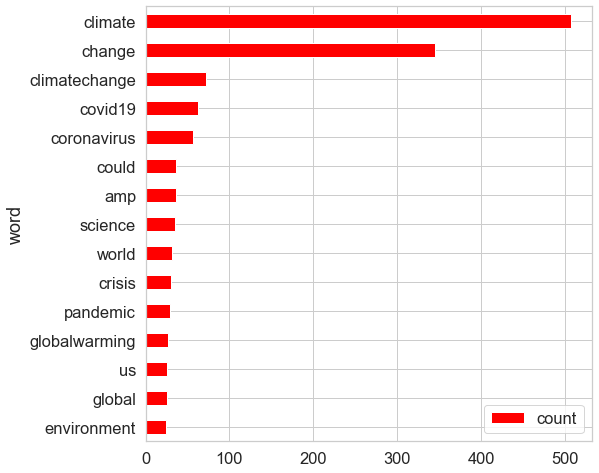

In [147]:
fig, ax = plt.subplots(figsize=(8,8))
clean_tweets_nsw.sort_values(by='count').plot.barh(x='word',
                                                  y='count',
                                                  ax=ax,
                                                  color='red')

In [148]:
#Bigrams and 
re?

In [118]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [195]:
def remove_url(txt):
    
    url_pattern = re.compile(r'https:?:/\S+|www\.\S+')
    no_url = url_pattern.sub(r'',txt)
    return no_url

In [209]:
all_tweets[0]

'Very good analysis by @McKinsey on relationships,  similarities &amp; differences between #Pandemics and #climate #risk… https://t.co/hndUwkm0pd'

In [210]:
#remove URLs
tweets_nourl = [remove_url(tweet) for tweet in all_tweets]

In [212]:
tweets_nourl[0]

'Very good analysis by @McKinsey on relationships,  similarities &amp; differences between #Pandemics and #climate #risk… '

In [151]:
#bigrams = co-occuring words /create a list of all bigrams
#tweets_nsw_nc is alist of all words in a tweet for all tweets created by lowering and splitting and removing
#removing connection words
terms_bigrams = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

In [152]:
terms_bigrams[0]

[('good', 'analysis'),
 ('analysis', 'mckinsey'),
 ('mckinsey', 'relationships'),
 ('relationships', 'similarities'),
 ('similarities', 'amp'),
 ('amp', 'differences'),
 ('differences', 'pandemics'),
 ('pandemics', 'risk')]

In [153]:
tweets_nsw_nc[0]

['good',
 'analysis',
 'mckinsey',
 'relationships',
 'similarities',
 'amp',
 'differences',
 'pandemics',
 'risk']

In [154]:
#use a counter to count bigrams in a list
bigrams = list(itertools.chain(*terms_bigrams))

In [155]:
bigrams_count = collections.Counter(bigrams)

In [156]:
bigrams_count.most_common(20)

[(('gpwx', 'globalwarming'), 13),
 (('investor', 'ideas'), 12),
 (('cleantech', 'podcast'), 12),
 (('coronavirus', 'pandemic'), 10),
 (('could', 'cause'), 9),
 (('science', 'links'), 9),
 (('ideas', 'cleantech'), 9),
 (('biodiversity', 'losses'), 8),
 (('links', 'science'), 8),
 (('global', 'warming'), 7),
 (('cause', 'sudden'), 7),
 (('sudden', 'biodiversity'), 7),
 (('losses', 'worldwide'), 7),
 (('turn', 'traffic'), 6),
 (('traffic', 'lights'), 6),
 (('lights', 'red'), 6),
 (('red', 'stop'), 6),
 (('stop', 'quickly'), 6),
 (('quickly', 'environment'), 6),
 (('environment', 'jus'), 6)]

In [157]:
bigrams_data = pd.DataFrame(bigrams_count.most_common(20),
                           columns=['bigram','count'])

In [158]:
bigrams_data.head()

,bigram,count
0,"(gpwx, globalwarming)",13
1,"(investor, ideas)",12
2,"(cleantech, podcast)",12
3,"(coronavirus, pandemic)",10
4,"(could, cause)",9


In [159]:
#visualize bigrams using python package networkx
#.set_index() helps change indexing colums of an array
#can convert to dictionary object to_dict
d = bigrams_data.set_index('bigram').T.to_dict('records')

In [165]:
d[0]

{('gpwx', 'globalwarming'): 13,
 ('investor', 'ideas'): 12,
 ('cleantech', 'podcast'): 12,
 ('coronavirus', 'pandemic'): 10,
 ('could', 'cause'): 9,
 ('science', 'links'): 9,
 ('ideas', 'cleantech'): 9,
 ('biodiversity', 'losses'): 8,
 ('links', 'science'): 8,
 ('global', 'warming'): 7,
 ('cause', 'sudden'): 7,
 ('sudden', 'biodiversity'): 7,
 ('losses', 'worldwide'): 7,
 ('turn', 'traffic'): 6,
 ('traffic', 'lights'): 6,
 ('lights', 'red'): 6,
 ('red', 'stop'): 6,
 ('stop', 'quickly'): 6,
 ('quickly', 'environment'): 6,
 ('environment', 'jus'): 6}

In [167]:
d[0].items()

dict_items([(('gpwx', 'globalwarming'), 13), (('investor', 'ideas'), 12), (('cleantech', 'podcast'), 12), (('coronavirus', 'pandemic'), 10), (('could', 'cause'), 9), (('science', 'links'), 9), (('ideas', 'cleantech'), 9), (('biodiversity', 'losses'), 8), (('links', 'science'), 8), (('global', 'warming'), 7), (('cause', 'sudden'), 7), (('sudden', 'biodiversity'), 7), (('losses', 'worldwide'), 7), (('turn', 'traffic'), 6), (('traffic', 'lights'), 6), (('lights', 'red'), 6), (('red', 'stop'), 6), (('stop', 'quickly'), 6), (('quickly', 'environment'), 6), (('environment', 'jus'), 6)])

In [168]:
G = nx.Graph()#base class stores nodes and edges
#create network plots

#Create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weights=(v*10))

In [169]:
G.add_node("china",weight=100)# K3 = nx.Graph([(0, 1), (1, 2), (2, 0)]) graph type

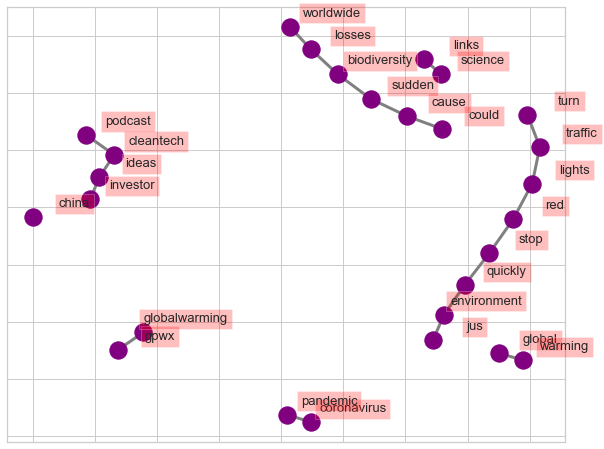

In [179]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=0.25)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
#using ax.text importsant
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


In [174]:
pos.items()

dict_items([('gpwx', array([-0.45116016,  0.78584636])), ('globalwarming', array([ 0.48723253, -0.78622584])), ('investor', array([ 0.2557414 , -0.91410601])), ('ideas', array([-0.59134764,  0.51649004])), ('cleantech', array([ 0.69462706, -0.68849624])), ('podcast', array([ 0.04711106, -0.96292262])), ('coronavirus', array([-0.97523595,  0.18465436])), ('pandemic', array([-0.89105675, -0.03383926])), ('could', array([ 0.93331181, -0.3095324 ])), ('cause', array([-0.29308248,  0.41481533])), ('science', array([0.43241657, 0.88879152])), ('links', array([-0.97124743, -0.20473869])), ('biodiversity', array([0.94783128, 0.13736552])), ('losses', array([-0.23923088, -0.92725675])), ('global', array([-0.56199797, -0.83685517])), ('warming', array([-0.15965361, -0.74136704])), ('sudden', array([0.23828826, 0.96309399])), ('worldwide', array([-0.63295744, -0.55033051])), ('turn', array([0.75009102, 0.61103676])), ('traffic', array([0.53108797, 0.67784466])), ('lights', array([0.86186218, 0.37

In [182]:
#Sentiment Analysis
!pip3 install textblob

     |████████████████████████████████| 636 kB 7.2 kB/s eta 0:00:01


In [183]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [185]:
TextBlob?

In [ ]:
tweets_nourl[0]

In [213]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_nourl]

In [215]:
sentiment_objects[0].polarity

0.9099999999999999

In [216]:
sentiment_objects[0]

TextBlob("Very good analysis by @McKinsey on relationships,  similarities &amp; differences between #Pandemics and #climate #risk… ")

In [217]:
#create list of polarity values and text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)]
                   for tweet in sentiment_objects]

In [218]:
sentiment_values[0]

[0.9099999999999999,
 'Very good analysis by @McKinsey on relationships,  similarities &amp; differences between #Pandemics and #climate #risk… ']

In [219]:
sentiment_data = pd.DataFrame(sentiment_values,
                             columns=['polarity','tweet'])
sentiment_data.head()

,polarity,tweet
0,0.910000,Very good analysis by @McKinsey on relationshi...
1,-0.600000,"#FEMA is overwhelmed, fire crews can’t fully p..."
2,-0.333333,Can attitude help save the planet? A frightene...
3,0.400000,The #coronavirus pandemic has put important #c...
4,-0.600000,"#FEMA is overwhelmed, fire crews can’t fully p..."


In [223]:
sentiment_data['tweet'].iloc[3] # calling a row

'The #coronavirus pandemic has put important #climate research in the #Arctic on hold '

In [226]:
sentiment_data['tweet'].iloc[3:7]

3    The #coronavirus pandemic has put important #c...
4    #FEMA is overwhelmed, fire crews can’t fully p...
5    How is climate change affecting air quality? \...
6    This is good time to start flattening the curv...
Name: tweet, dtype: object

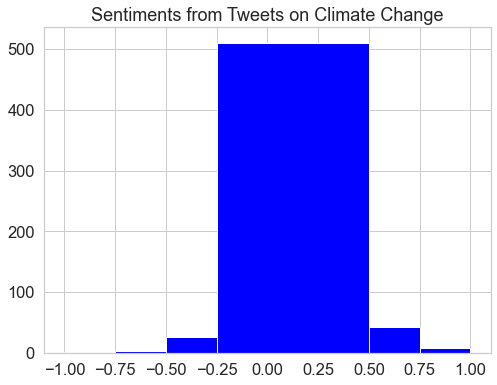

In [228]:
fig,ax = plt.subplots(figsize=(8,6))

sentiment_data.hist(bins=[-1, -0.75, -0.5, -0.25, 0.5, 0.75, 1],
                   ax=ax,
                   color='blue')
plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [229]:
# remove zero polarity
#to mask a data frame
sentiment_data_noneutral = sentiment_data[sentiment_data.polarity !=0]

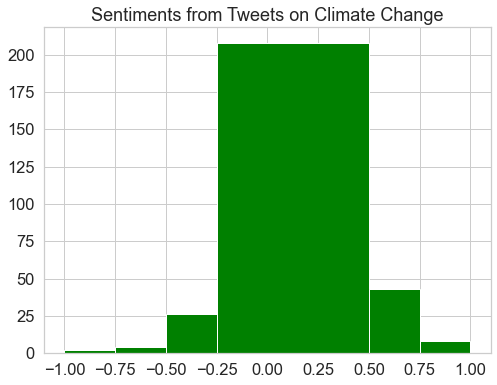

In [230]:
fig,ax = plt.subplots(figsize=(8,6))
sentiment_data_noneutral.hist(bins=[-1, -0.75, -0.5, -0.25, 0.5, 0.75, 1],
                   ax=ax,
                   color='green')
plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [264]:
search_term = "#COVID19 -filter:retweets"
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-04-13').items(500)
all_tweets_no_urls =[TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("Also Just-In: @GovInslee announces plan to reduce WA prison population by up to 950 through early release to reduce… "),
 TextBlob("4188 new cases and 574 new deaths in France 
 
 [19:38 GMT] #coronavirus #CoronaVirusUpdate #COVID19 #CoronavirusPandemic"),
 TextBlob("I will continue social distancing from some of you after all this over. #Covid19"),
 TextBlob("@MarkDice @SSG_PAIN 😳😲😒 we should all storm into our local hospitals and demand to see all these #Covid19 patients.… "),
 TextBlob("Great story about a Georgian keeping the “lights on” for @CNN during the #COVID19 crisis #gapol @ATTPolicyGA ")]

In [265]:
wild_sent_values =[[tweet.sentiment.polarity,str(tweet)]
                  for tweet in all_tweets_no_urls]

In [266]:
wild_send_data = pd.DataFrame(wild_sent_values,
                             columns =['polarity','tweet'])
wild_send_data = wild_send_data[wild_send_data.polarity !=0]
wild_send_data

,polarity,tweet
0,0.100000,Also Just-In: @GovInslee announces plan to red...
1,0.136364,4188 new cases and 574 new deaths in France \n...
2,0.033333,I will continue social distancing from some of...
4,0.800000,Great story about a Georgian keeping the “ligh...
5,-0.100000,COVID-ALERT: Woman loses entire family to coro...
...,...,...
3992,0.400000,"UPDATE: As of Sunday night, Florida had 19,895..."
3993,0.100000,We won't let #covid19 stop us from performing ...
3994,0.100000,Nearly 24 #COVID19 tests have received an emer...
3996,0.150000,As the research and medical community seeks an...


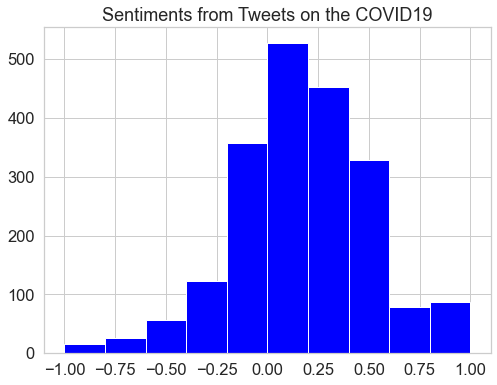

In [267]:
fig, ax = plt.subplots(figsize=(8, 6))
wild_send_data.hist(bins=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],
        ax=ax, color="blue")
plt.title("Sentiments from Tweets on the COVID19")
plt.show()

In [268]:
all_tweets_no_urls =[remove_url(tweet.text) for tweet in tweets]
terms_bigrams = [list(bigrams(tweet)) for tweet in all_tweets_no_urls]

In [270]:
all_tweets_no_urls

[]

In [273]:
#----------------FINAL PRACTICE WITH JSON TWITTER DATASET

In [294]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import json
import tweepy as tw
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
import re
from textblob import TextBlob
import networkx
import networkx as nx
import earthpy as et

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# Get the already collected twitter data in JSON format
et.data.get_data('twitter-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME,'Data_Python','earth-analytics', 'data'))
#Downloadng from https://ndownloader.figshare.com/files/10960175

In [295]:
et.data.data_keys

['california-rim-fire',
 'co-flood-extras',
 'cold-springs-fire',
 'cold-springs-landsat-scenes',
 'cold-springs-modis-h4',
 'colorado-flood',
 'cs-test-landsat',
 'cs-test-naip',
 'ndvi-automation',
 'spatial-vector-lidar',
 'twitter-flood',
 'vignette-elevation',
 'vignette-landsat']

In [301]:
os.chdir('twitter-flood/')

In [304]:
!ls

twitter-flood


In [303]:
os.chdir(os.path.join(et.io.HOME,'Data_Python','earth-analytics', 'data'))

In [291]:
#os.chdir()change directory
#os.path.join() joins path names separated /
#et.io.HOME?
os.path.join(et.io.HOME,'Data_Python', 'earth-analytics', 'data')

'/Users/adarshkumar/Data_Python/earth-analytics/data'